In [1]:
import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sklearn

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

import imblearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
data = pd.read_csv('loan_approval.csv')

In [3]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


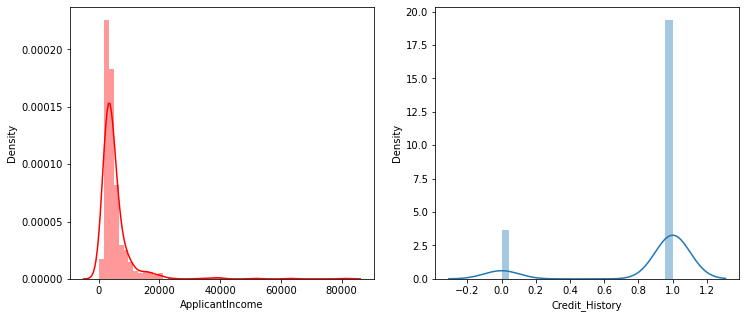

In [4]:
plt.figure(figsize=(12,5))

plt.subplot(121)

sns.distplot(data['ApplicantIncome'], color='r')

plt.subplot(122)

sns.distplot(data['Credit_History'])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


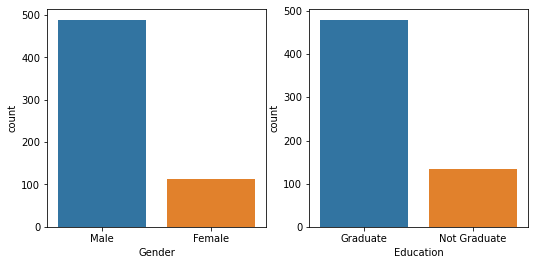

In [5]:
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)

sns.countplot(data['Gender'])

plt.subplot(1,4,2)

sns.countplot(data['Education'])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

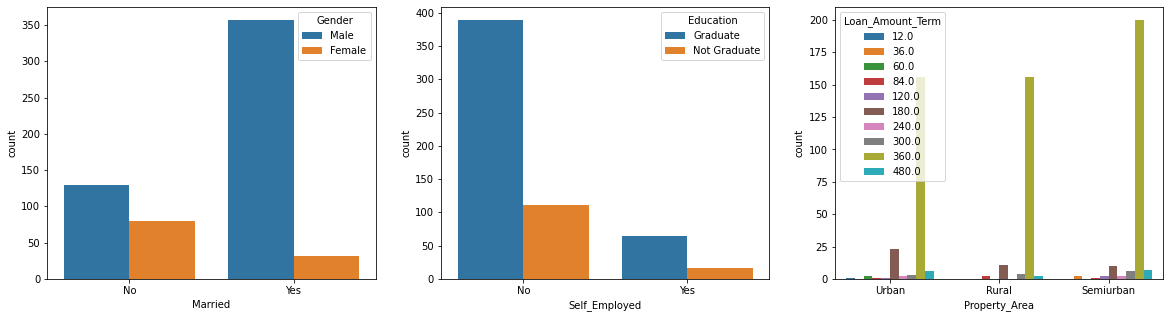

In [6]:
plt.figure(figsize=(20,5))

plt.subplot(131)

sns.countplot(data[ 'Married'], hue=data['Gender'])

plt.subplot(132)

sns.countplot(data['Self_Employed'], hue=data['Education'])

plt.subplot(133)

sns.countplot(data[ 'Property_Area'], hue=data['Loan_Amount_Term'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

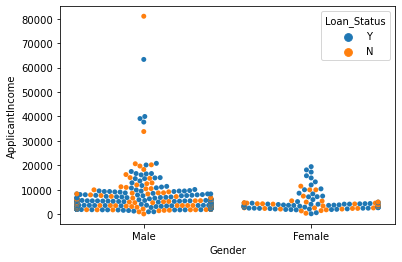

In [7]:
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [10]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

#replacing + with space for filling the nan values

data['Dependents'] = data['Dependents'].str.replace('+',' ')

data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

data['Self_Employed'] = data['Self_Employed'].fillna (data['Self_Employed'].mode()[0])

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna (data['Loan_Amount_Term'].mode()[0])

data['Credit_History'] = data['Credit_History'].fillna (data['Credit_History'].mode()[0])

C:\Users\sasid\AppData\Local\Temp/ipykernel_23216/2018110388.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents'] = data['Dependents'].str.replace('+',' ')


In [12]:
data['Gender']=data['Gender'].map({'Female':1, 'Male':0})

data['Property_Area']=data['Property_Area'].map({"Urban": 2, "Semiurban": 1, "Rural":0})

data['Married']=data['Married'].map({'Yes':1, 'No':0})

data['Self_Employed']=data['Self_Employed'].map({'Yes':1, 'No':0})

data['Education']=data['Education'].map({'Graduate':1, 'Not Graduate':0})

data['Loan_Status']=data['Loan_Status'].map({'Y':1, 'N':0})

In [13]:
data['Gender']=data['Gender'].astype('int64')

data['Married']=data['Married'].astype('int64')

data['Dependents']=data['Dependents'].astype('int64')

data['Self_Employed']=data['Self_Employed'].astype('int64')

data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
                                                           
data['LoanAmount']=data['LoanAmount'].astype('int64')

data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')

data['Credit_History']=data['Credit_History'].astype('int64')

In [14]:
from imblearn.combine import SMOTETomek

In [15]:
smote = SMOTETomek(0.90)

In [16]:
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis=1)

In [17]:
x_bal,y_bal = smote.fit_resample(x,y)

In [18]:
print(y.value_counts())

print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    351
0    308
Name: Loan_Status, dtype: int64


In [19]:
sc=StandardScaler()

x_bal=sc.fit_transform(x_bal)

In [20]:
x_bal=pd.DataFrame(x_bal)

In [21]:
x_train, x_test, y_train, y_test = train_test_split( x_bal, y_bal, test_size=0.33, random_state=42)

In [22]:
def decisionTree(x_train, x_test, y_train, y_test):
    
    dt=DecisionTreeClassifier()
    
    dt.fit(x_train,y_train)

    yPred = dt.predict(x_test)
    
    print('***Decision TreeClassifier***')
    
    print('Confusion matrix')
    
    print(confusion_matrix(y_test, yPred))
    
    print('Classification report')
    
    print(classification_report (y_test, yPred))


In [23]:
def RandomForest (x_train, x_test, y_train, y_test):

    rf = RandomForestClassifier()
    
    rf.fit(x_train,y_train)
    
    yPred = rf.predict(x_test)
    
    print('***RandomForestClassifier***')
    
    print('Confusion matrix')
    
    print(confusion_matrix(y_test,yPred))
    
    print('Classification report')
    
    print(classification_report (y_test,yPred))

In [24]:
def KNN(x_train, x_test, y_train, y_test):

    knn = KNeighborsClassifier()

    knn.fit(x_train,y_train)
    
    yPred=knn.predict(x_test)

    print('***KNeighborsClassifier***')

    print('Confusion matrix')

    print(confusion_matrix(y_test,yPred))

    print('Classification report')

    print(classification_report (y_test, yPred))

In [25]:
def xgboost (x_train, x_test, y_train, y_test):

    xg = GradientBoostingClassifier()

    xg.fit(x_train,y_train)

    yPred = xg.predict(x_test)

    print('***GradientBoostingClassifier***')
    
    print('Confusion matrix')

    print(confusion_matrix (y_test,yPred))

    print('Classification report')
    
    print(classification_report (y_test, yPred))

In [26]:
RandomForest(x_train,x_test,y_train,y_test)

***RandomForestClassifier***
Confusion matrix
[[ 75  27]
 [ 10 106]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       102
           1       0.80      0.91      0.85       116

    accuracy                           0.83       218
   macro avg       0.84      0.82      0.83       218
weighted avg       0.84      0.83      0.83       218



In [27]:
decisionTree(x_train,x_test,y_train,y_test)

***Decision TreeClassifier***
Confusion matrix
[[72 30]
 [25 91]]
Classification report
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       102
           1       0.75      0.78      0.77       116

    accuracy                           0.75       218
   macro avg       0.75      0.75      0.75       218
weighted avg       0.75      0.75      0.75       218



In [28]:
KNN(x_train,x_test,y_train,y_test)

***KNeighborsClassifier***
Confusion matrix
[[ 64  38]
 [ 13 103]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       102
           1       0.73      0.89      0.80       116

    accuracy                           0.77       218
   macro avg       0.78      0.76      0.76       218
weighted avg       0.78      0.77      0.76       218



In [29]:
xgboost(x_train,x_test,y_train,y_test)

***GradientBoostingClassifier***
Confusion matrix
[[ 71  31]
 [ 10 106]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.77      0.91      0.84       116

    accuracy                           0.81       218
   macro avg       0.83      0.80      0.81       218
weighted avg       0.82      0.81      0.81       218



In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [32]:
f1_score(yPred,y_test,average='weighted')

0.8235165462622607

In [33]:
cv = cross_val_score(rf,x,y,cv=5)

In [34]:
np.mean(cv)

0.776889244302279

In [35]:
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
pickle.dump(rf,open('rdf.pkl','wb'))

In [36]:
from flask import Flask, render_template, request

import numpy as np

import pickle

In [37]:
app = Flask(__name__)

model = pickle.load(open (r'rdf.pkl', 'rb'))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [38]:
@app.route('/')
def home():
    return render_template('home.html')

In [39]:
@app.route('/submit', methods=[ "POST", "GET"])# route to show the predictions in a web UI 

def submit():

    #reading the inputs given by the user
    
    input_feature=[int (x) for x in request.form.values() ]
    
    #input_feature= np.transpose(input_feature) input_feature=[np.array(input_feature)]

    print(input_feature)

    names = ['Gender', 'Married', 'Dependents', 'Education', 'Self Employed', 'ApplicantIncome' , 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
    
    data = pandas.DataFrame(input_feature, columns=names)

    print(data)

    #data_scaled = scale. fit_transform(data) #data = pandas.DataFrame(, columns=names)

    # predictions using the loaded model file

    prediction=model.predict(data)

    print (prediction)

    prediction = int(prediction)
    
    print(type(prediction))

    if (prediction == 0):

        return render_template("output.html", result = "Loan wiil Not be Approved")

    else:

        return render_template("output.html",result = "Loan will be Approved")

In [40]:
import os

In [ ]:
if __name__ == "__main__":
    port = int(os.environ.get('PORT',5000))
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
